In [2]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

%load_ext autoreload
%autoreload 2

In [3]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.65,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 100,
              'delay': 500}

## Parallel Simulation

In [5]:
#initializing params object
#params = Params.from_dict({**PARAMS_DICT, 'tau':150, th': 0.65, 'sigma':0.01})
params = Params.from_dict({**PARAMS_DICT, 'tau': 100, 'th':0.7, 'sigma':0.05})

#initializing simulation class
parsim = ParallelSimulation(params)

#simulation
stimulus = 500
K = 5.0
initI = 0.8
par_result = parsim.simulate(stimulus, K, initI)

Stimulus: 500 , Production of trial 10 (blue): 600.0


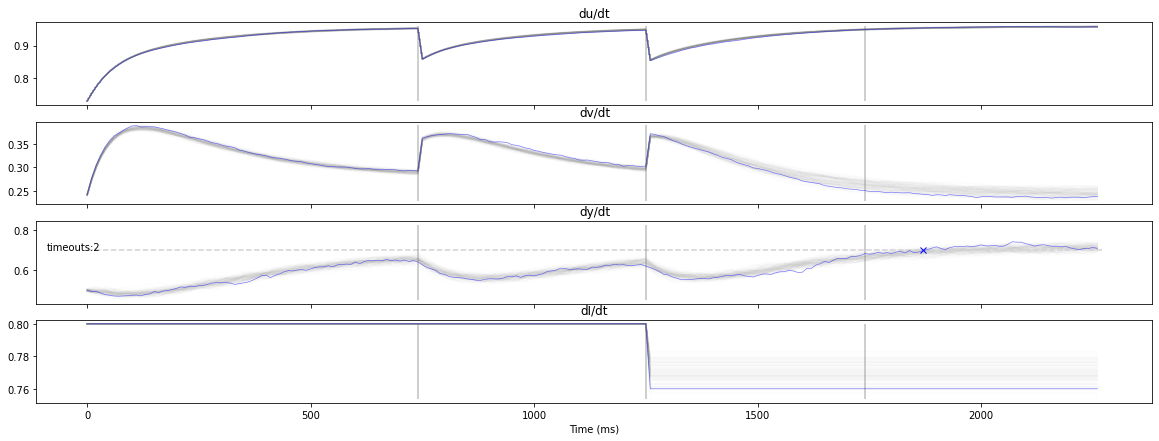

In [6]:
plot = SimulationPlot(par_result.create_simulation_plot_data())
alpha=0.01
plot.plot_trials(alpha)
plot.plot_example_trial(stimulus, 10)

In [7]:
#simulation
stimulus_range = [400,500,600,700,800]
K = 7.0
initI = 0.77
par_range_result = parsim.simulate_range(stimulus_range, K, initI)

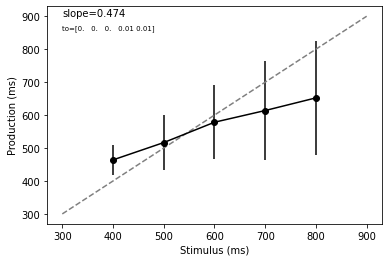

In [8]:
plot = BehavioralPlot(par_range_result.create_behavioral_plot_data())
plot.plot_behavior()

## Experiment Simulation

In [9]:
params = Params.from_dict({**PARAMS_DICT, 'ntrials': 10, 'tau': 100, 'th':0.7, 'delay':700})
expsim = ExperimentSimulation(params)

stimulus_range = [400,500,600,700,800]
stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)
#stimulus_lst = [1000,400, 800, 400]

K = 5.0
initI = 0.8
exp_result = expsim.simulate(stimulus_lst, K, initI)

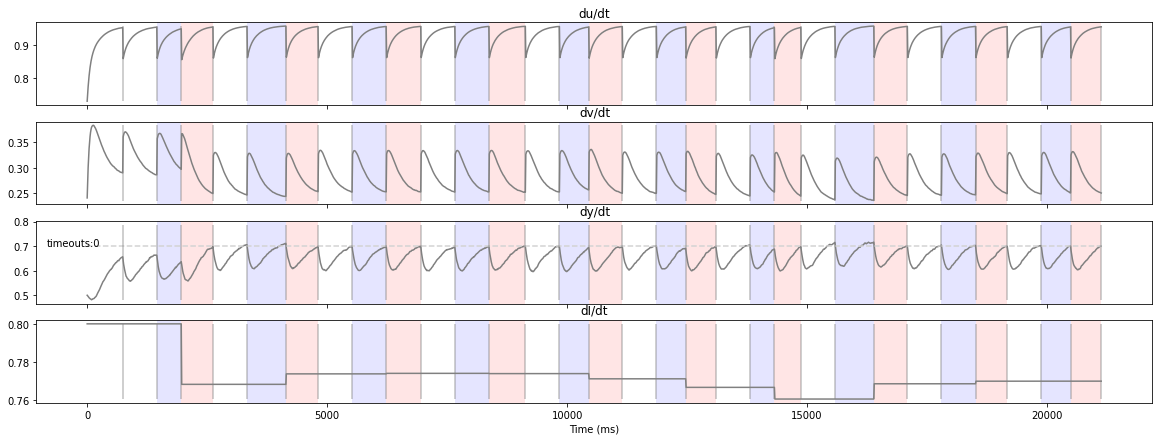

In [10]:
alpha = 1
# plot = SimulationPlot(exp_result.create_simulation_plot_data())
plot = exp_result.create_simulation_plot()
plot.plot_trials(alpha)
plot.plot_measurement_production_frames()

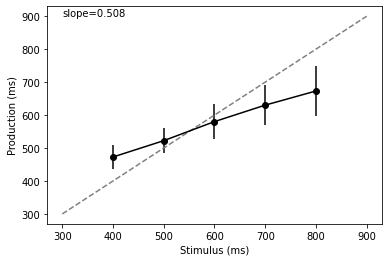

In [11]:
#params = Params.from_dict({**PARAMS_DICT, 'ntrials': 500, 'delay':600}) #'th': 0.65, 'sigma':0.01, 'tau': 150,
params = Params(ntrials=500, th=0.65, tau=100, delay=700, sigma=0.01)
expsim = ExperimentSimulation(params)

stimulus_range = [400,500,600,700,800]
stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)
K = 5.0
initI = 0.8

exp_result = expsim.simulate(stimulus_lst, K, initI)
plot = exp_result.create_behavioral_plot()
#plot = BehavioralPlot(exp_result.create_behavioral_plot_data_experiment_simulation())
plot.plot_behavior()

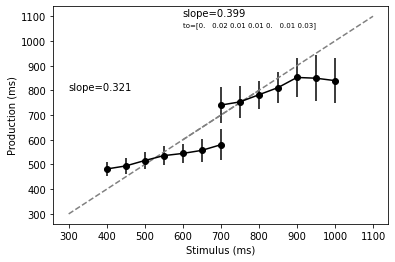

In [14]:
initI = 0.8

params = Params(ntrials=1000, delay=700, tau=100, th=0.7)
expsim = ExperimentSimulation(params)
stimulus_range = [400, 450, 500, 550, 600, 650, 700]
K = 4.0
stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)
exp_result = expsim.simulate(stimulus_lst, K, initI)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()


params = Params(ntrials=500, delay=700, tau=100, th=0.7)
expsim = ExperimentSimulation(params)
stimulus_range = [700, 750, 800, 850, 900, 950, 1000]
K = 4.0
stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)
exp_result = expsim.simulate(stimulus_lst, K, initI)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()

In [32]:
initI = 0.8

params = Params(ntrials=1000, delay=700, tau=100, th=0.7)
expsim = ExperimentSimulation(params)
stimulus_range = [400, 450, 500, 550, 600, 650, 700]
K = 4.0
stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)
exp_result = expsim.simulate(stimulus_lst, K, initI)



In [ ]:
data = exp_result.create_behavioral_data()

# Exploring Parameter: K, $\tau$, $\sigma$, threshold, delay

timeouts: [(400, 0), (450, 0), (500, 0), (550, 0), (600, 0), (650, 0), (700, 0)]
timeouts: [(400, 0), (450, 0), (500, 0), (550, 0), (600, 0), (650, 0), (700, 0)]
timeouts: [(400, 0), (450, 0), (500, 0), (550, 0), (600, 0), (650, 0), (700, 0)]


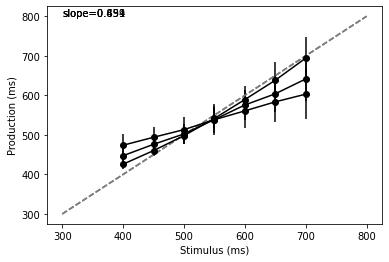

In [177]:
initI = 0.8

params = Params(ntrials=500, delay=700, tau=100, th=0.7)
expsim = ExperimentSimulation(params)
stimulus_range = [400, 450, 500, 550, 600, 650, 700]
stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)

K = 5.0
exp_result = expsim.simulate(stimulus_lst, K, initI)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()

K = 7.0
exp_result = expsim.simulate(stimulus_lst, K, initI)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()

K = 9.0
exp_result = expsim.simulate(stimulus_lst, K, initI)
plot = exp_result.create_behavioral_plot()
plot.plot_behavior()

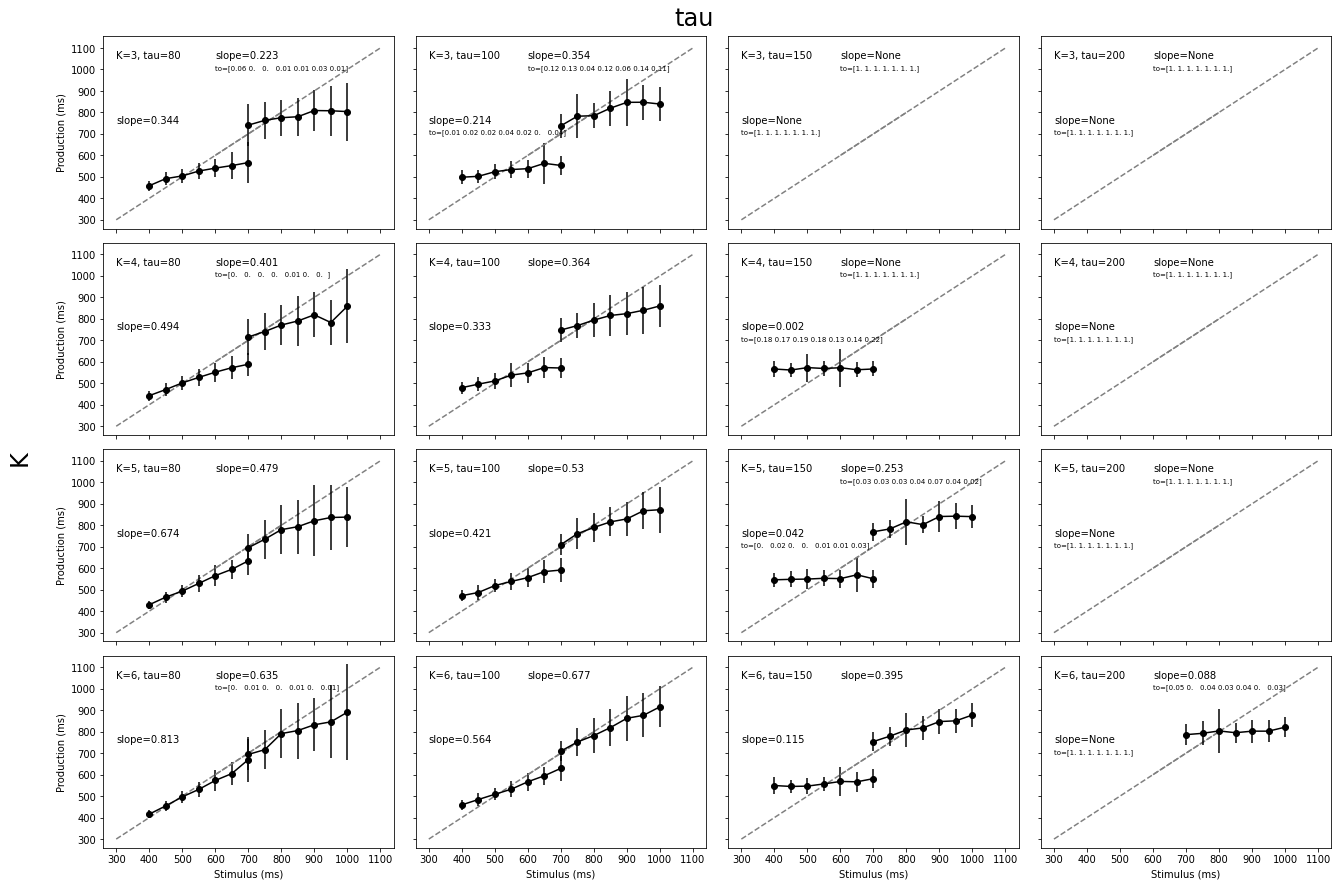

In [10]:
stimulus_range1 = [400, 450, 500, 550, 600, 650, 700]
stimulus_range2 = [700, 750, 800, 850, 900, 950, 1000]


K_lst =[3,4,5,6]
tau=[80,100,150,200]
initI = 0.8
fig, ax = plt.subplots(4,4, figsize=(18,12), sharex=True, sharey=True)



i = 0
for K in K_lst:
    for t in tau:

        params = Params(ntrials=500, delay=700, tau=t, th=0.7)
        expsim = ExperimentSimulation(params)
        
        stimulus_lst1 = expsim.generate_stimulus_lst(stimulus_range1)
        exp_result1 = expsim.simulate(stimulus_lst1, K, initI)
        plot = exp_result1.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])
        
        stimulus_lst2 = expsim.generate_stimulus_lst(stimulus_range2)
        exp_result2 = expsim.simulate(stimulus_lst2, K, initI)
        plot = exp_result2.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])
        
        ax.flatten()[i].text(np.min(stimulus_range1)-100, np.max(stimulus_range2)+50, 'K='+str(K)+', tau='+str(t))
        i += 1
        
for a in ax.flat:
    a.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
    a.label_outer()

fig.text(0.5, 1.0, 'tau', ha='center', fontsize=24)
fig.text(-0.03, 0.5, 'K', va='center', rotation='vertical',  fontsize=24)

plt.tight_layout()

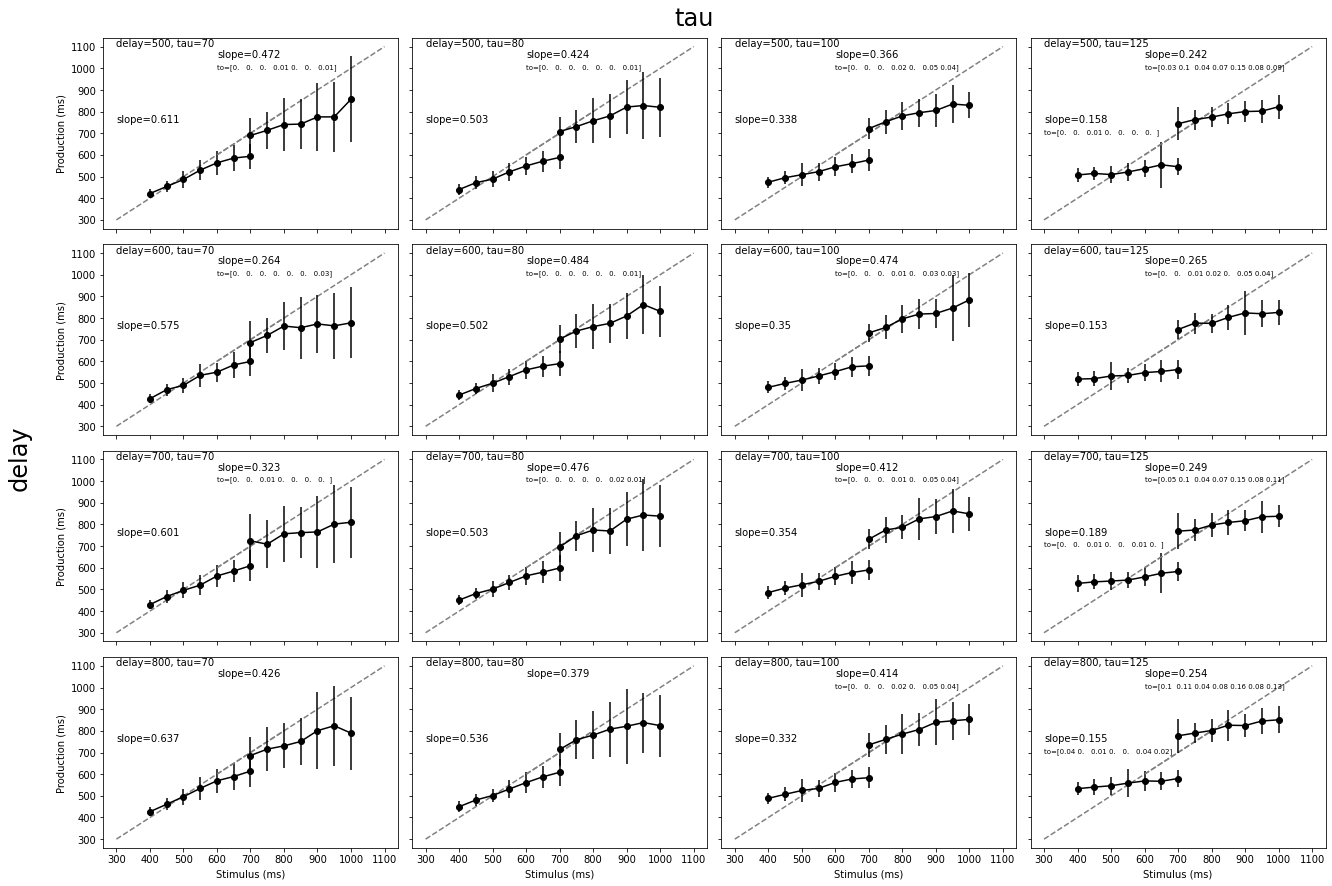

In [25]:
stimulus_range1 = [400, 450, 500, 550, 600, 650, 700]
stimulus_lst1 = expsim.generate_stimulus_lst(stimulus_range1)
stimulus_range2 = [700, 750, 800, 850, 900, 950, 1000]
stimulus_lst2 = expsim.generate_stimulus_lst(stimulus_range2)

K = 4
delay_lst = [500,600,700,800]
tau=[70,80,100,125]
initI = 0.8
fig, ax = plt.subplots(4,4, figsize=(18,12), sharex=True, sharey=True)

i = 0
for delay in delay_lst:
    for t in tau:
        params = Params(ntrials=500, delay=delay, tau=t, th=0.7)
        expsim = ExperimentSimulation(params)
        
        exp_result1 = expsim.simulate(stimulus_lst1, K, initI)
        plot = exp_result1.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])

        exp_result2 = expsim.simulate(stimulus_lst2, K, initI)
        plot = exp_result2.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])
        
        ax.flatten()[i].text(np.min(stimulus_range1)-100, np.max(stimulus_range2)+100, 'delay='+str(delay)+', tau='+str(t))
        i += 1
        
for a in ax.flat:
    a.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
    a.label_outer()

fig.text(0.5, 1.0, 'tau', ha='center', fontsize=24)
fig.text(-0.03, 0.5, 'delay', va='center', rotation='vertical',  fontsize=24)

plt.tight_layout()

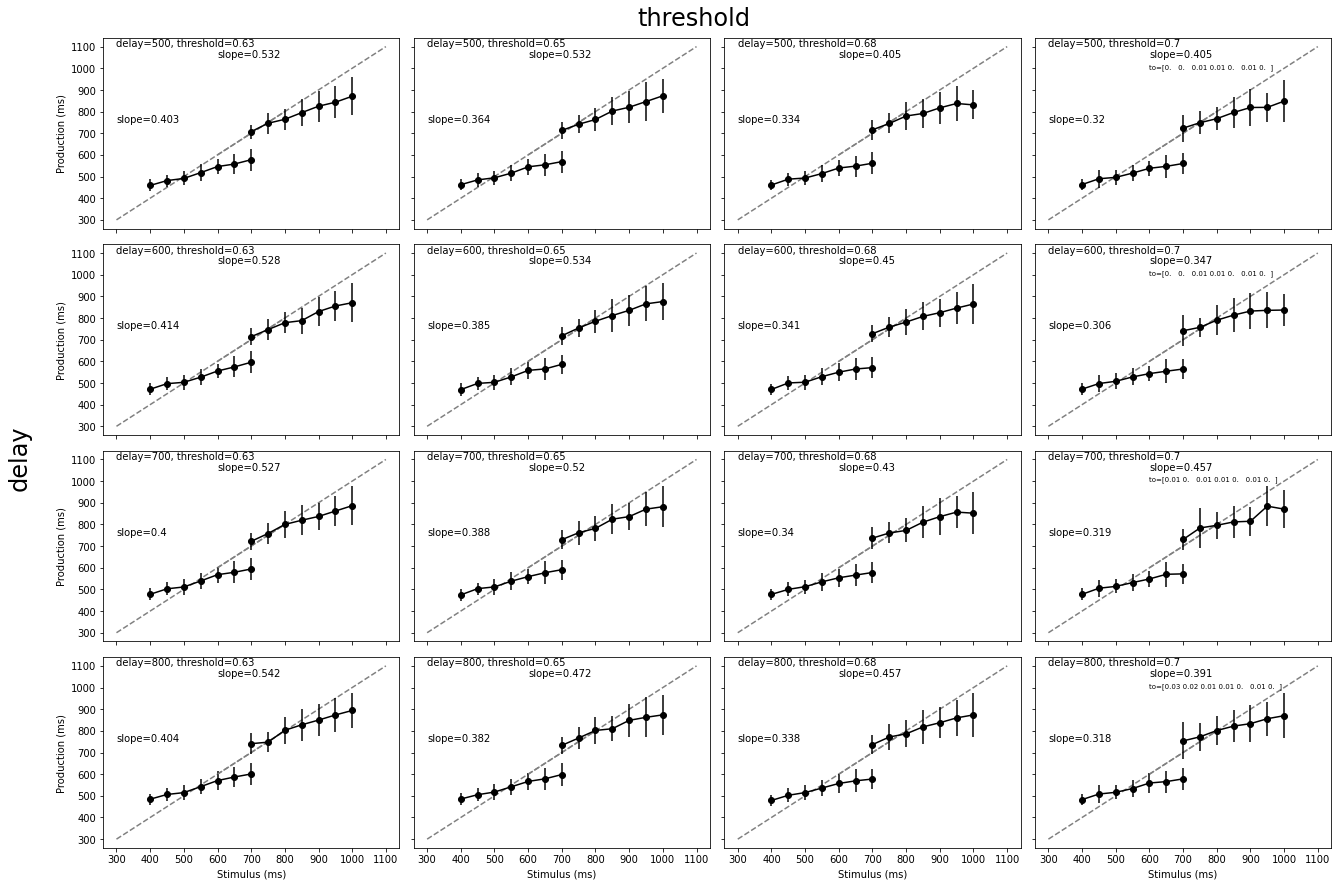

In [26]:
stimulus_range1 = [400, 450, 500, 550, 600, 650, 700]
stimulus_lst1 = expsim.generate_stimulus_lst(stimulus_range1)
stimulus_range2 = [700, 750, 800, 850, 900, 950, 1000]
stimulus_lst2 = expsim.generate_stimulus_lst(stimulus_range2)

K = 4
th_lst = [0.63, 0.65,0.68,0.7]
delay_lst = [500,600,700,800]
initI = 0.8
fig, ax = plt.subplots(4,4, figsize=(18,12), sharex=True, sharey=True)

i = 0
for delay in delay_lst:
    for t in th_lst:
        params = Params(ntrials=500, delay=delay, tau=100, th=t)
        expsim = ExperimentSimulation(params)
        
        exp_result1 = expsim.simulate(stimulus_lst1, K, initI)
        plot = exp_result1.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])

        exp_result2 = expsim.simulate(stimulus_lst2, K, initI)
        plot = exp_result2.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])
        
        ax.flatten()[i].text(np.min(stimulus_range1)-100, np.max(stimulus_range2)+100, 'delay='+str(delay)+', threshold='+str(t))
        i += 1
        
for a in ax.flat:
    a.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
    a.label_outer()

fig.text(0.5, 1.0, 'threshold', ha='center', fontsize=24)
fig.text(-0.03, 0.5, 'delay', va='center', rotation='vertical',  fontsize=24)

plt.tight_layout()

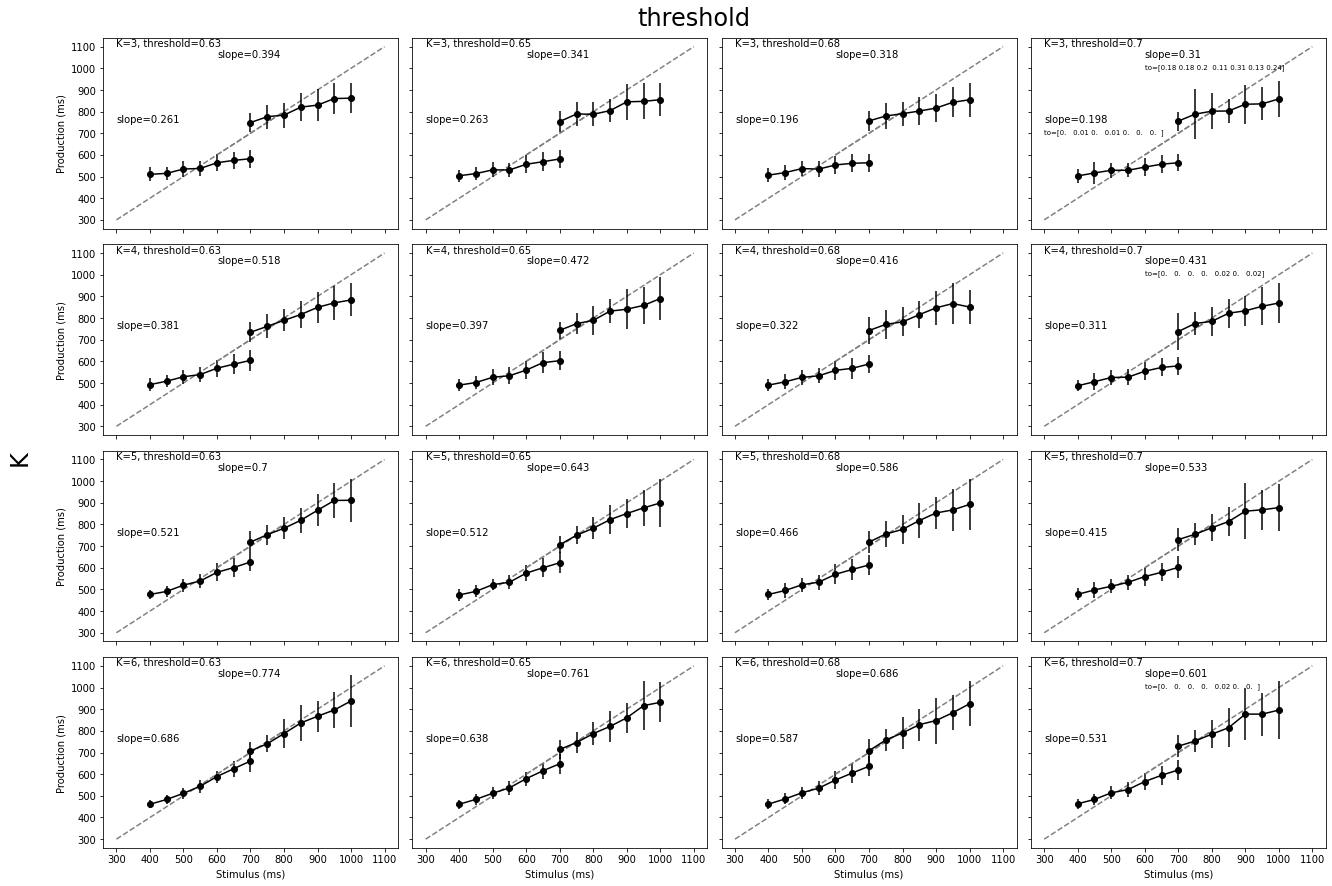

In [28]:
stimulus_range1 = [400, 450, 500, 550, 600, 650, 700]
stimulus_lst1 = expsim.generate_stimulus_lst(stimulus_range1)
stimulus_range2 = [700, 750, 800, 850, 900, 950, 1000]
stimulus_lst2 = expsim.generate_stimulus_lst(stimulus_range2)

th_lst = [0.63, 0.65,0.68,0.7]
K_lst =[3,4,5,6]
initI = 0.8
fig, ax = plt.subplots(4,4, figsize=(18,12), sharex=True, sharey=True)

i = 0
for K in K_lst:
    for th in th_lst:
        for t in 
        params = Params(ntrials=500, delay=800, tau=100, th=th)
        expsim = ExperimentSimulation(params)
        
        exp_result1 = expsim.simulate(stimulus_lst1, K, initI)
        plot = exp_result1.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])

        exp_result2 = expsim.simulate(stimulus_lst2, K, initI)
        plot = exp_result2.create_behavioral_plot()
        plot.plot_behavior(ax.flatten()[i])
        
        ax.flatten()[i].text(np.min(stimulus_range1)-100, np.max(stimulus_range2)+100, 'th='+str(th)+', K='+str(K))
        i += 1
        
for a in ax.flat:
    a.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
    a.label_outer()

plt.tight_layout()

In [ ]:
stimulus_range1 = [400, 450, 500, 550, 600, 650, 700]
stimulus_lst1 = expsim.generate_stimulus_lst(stimulus_range1)
stimulus_range2 = [700, 750, 800, 850, 900, 950, 1000]
stimulus_lst2 = expsim.generate_stimulus_lst(stimulus_range2)

th_lst = [0.63, 0.65,0.68,0.7, 0.73]
K_lst =[3,4,5,6, 7]
delay_lst = [500,600,700,800]
tau=[70,80,100,125]

initI = 0.8
fig, ax = plt.subplots(4,4, figsize=(18,12), sharex=True, sharey=True)

i = 0
for K in K_lst:
    for th in th_lst:
        for t in tau:
            for delay in delay_lst:
        
                params = Params(ntrials=500, delay=delay, tau=t, th=th)
                expsim = ExperimentSimulation(params)

                exp_result1 = expsim.simulate(stimulus_lst1, K, initI)
                plot = exp_result1.create_behavioral_plot()
                plot.plot_behavior(ax.flatten()[i])

                exp_result2 = expsim.simulate(stimulus_lst2, K, initI)
                plot = exp_result2.create_behavioral_plot()
                plot.plot_behavior(ax.flatten()[i])

                ax.flatten()[i].text(np.min(stimulus_range1)-100, np.max(stimulus_range2)+100, 'th='+str(th)+', K='+str(K)+', tau='str(t)+'delay='+str(delay))
                i += 1
        
for a in ax.flat:
    a.set(xlabel='Stimulus (ms)', ylabel='Production (ms)')
    a.label_outer()

#fig.text(0.5, 1.0, 'threshold', ha='center', fontsize=24)
#fig.text(-0.03, 0.5, 'K', va='center', rotation='vertical',  fontsize=24)

plt.tight_layout()

In [8]:
from multiprocessing import Pool
import time

stimulus_range1 = [400, 450, 500, 550, 600, 650, 700]

K_lst =[3,4,5,6]
tau=[80,100,150,200]

def execute(d):
    stimulus_range1, K, t = d
    print("executing")
    initI = 0.8
    
    params = Params(ntrials=500, delay=700, tau=t, th=0.7)
    expsim = ExperimentSimulation(params)
    stimulus_lst1 = expsim.generate_stimulus_lst(stimulus_range1)
        
    return expsim.simulate(stimulus_lst1, K, initI)

search_space = []

for K in K_lst:
    for t in tau:
        search_space.append((stimulus_range1, K, t))

def run_parallel():
    with Pool(4) as p:
        return p.map(execute, search_space)

    
results = run_parallel()
results

executingexecutingexecutingexecutingexecutingexecutingexecuting






executing
executing
executingexecuting

executing
executing
executing
executing
executing


KeyboardInterrupt: 